In [12]:
from open_flamingo import create_model_and_transforms
from huggingface_hub import hf_hub_download
import torch
from PIL import Image
import requests

In [2]:
model, image_processor, tokenizer = create_model_and_transforms(
    clip_vision_encoder_path="ViT-L-14",
    clip_vision_encoder_pretrained="openai",
    lang_encoder_path="anas-awadalla/mpt-1b-redpajama-200b",
    tokenizer_path="anas-awadalla/mpt-1b-redpajama-200b",
    cross_attn_every_n_layers=1  # Defaults to ~/.cache
)

You are using config.init_device='cpu', but you can also use config.init_device="meta" with Composer + FSDP for fast initialization.
Flamingo model initialized with 1046992944 trainable parameters


In [3]:
checkpoint_path = hf_hub_download("openflamingo/OpenFlamingo-3B-vitl-mpt1b", "checkpoint.pt")
model.load_state_dict(torch.load(checkpoint_path), strict=False)

_IncompatibleKeys(missing_keys=['vision_encoder.class_embedding', 'vision_encoder.positional_embedding', 'vision_encoder.proj', 'vision_encoder.conv1.weight', 'vision_encoder.ln_pre.weight', 'vision_encoder.ln_pre.bias', 'vision_encoder.transformer.resblocks.0.ln_1.weight', 'vision_encoder.transformer.resblocks.0.ln_1.bias', 'vision_encoder.transformer.resblocks.0.attn.in_proj_weight', 'vision_encoder.transformer.resblocks.0.attn.in_proj_bias', 'vision_encoder.transformer.resblocks.0.attn.out_proj.weight', 'vision_encoder.transformer.resblocks.0.attn.out_proj.bias', 'vision_encoder.transformer.resblocks.0.ln_2.weight', 'vision_encoder.transformer.resblocks.0.ln_2.bias', 'vision_encoder.transformer.resblocks.0.mlp.c_fc.weight', 'vision_encoder.transformer.resblocks.0.mlp.c_fc.bias', 'vision_encoder.transformer.resblocks.0.mlp.c_proj.weight', 'vision_encoder.transformer.resblocks.0.mlp.c_proj.bias', 'vision_encoder.transformer.resblocks.1.ln_1.weight', 'vision_encoder.transformer.resbloc



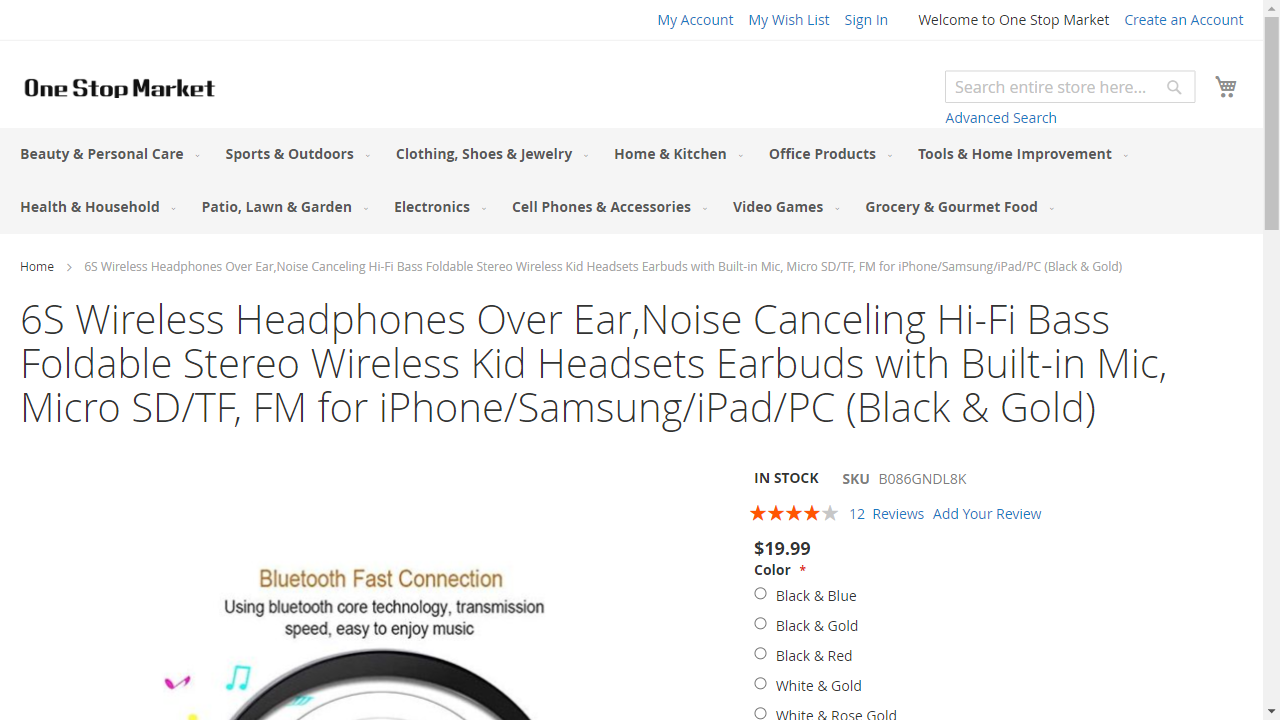

In [27]:
from bs4 import BeautifulSoup
html_file = open("..\\webarena_results\\render_21.html", "r", encoding="latin_1")
index = html_file.read()

S = BeautifulSoup(index, "html.parser")
imgs = S.find_all("img")
print(imgs[0]['src'])

import urllib.request
urllib.request.urlretrieve(imgs[0]['src'], "headphones.png")

query_image = Image.open("headphones.png")

demo_image_one = Image.open("hp_fax.PNG")


In [28]:
vision_x = [image_processor(demo_image_one).unsqueeze(0), image_processor(query_image).unsqueeze(0)]
vision_x = torch.cat(vision_x, dim=0)
vision_x = vision_x.unsqueeze(1).unsqueeze(0)

In [29]:
tokenizer.padding_side = "left" # For generation padding tokens should be on the left
lang_x = tokenizer(
    ["<image>An image of HP CB782A#ABA 640 Inkjet Fax Machine (Renewed)<|endofchunk|><image>An image of"],
    return_tensors="pt",
)

In [31]:
generated_text = model.generate(
    vision_x=vision_x,
    lang_x=lang_x["input_ids"],
    attention_mask=lang_x["attention_mask"],
    max_new_tokens=50,
    num_beams=3,
)

print("Generated text: ", tokenizer.decode(generated_text[0]))

Setting `pad_token_id` to `eos_token_id`:50277 for open-end generation.


Generated text:  <image>An image of HP CB782A#ABA 640 Inkjet Fax Machine (Renewed)<|endofchunk|><image>An image of Headphones Over Ear Noise Cancelling With Microphone (Black) For iPad Mini (Black) For iPad Mini (Black) For iPad Mini (Black) For iPad Mini (Black) For iPad Mini (Black) For iPad Mini (Black
